# **Week 9 notebook**

### **Exam 2009 problem 3**

The data originate from an experiment where a supermarket chain randomly assigned different prices (in US dollars) to a house brand of coffee. The coffee was advertised (advertise=1) in a standard way in all cases. The amount of coffee sold (in pounds) was registered. Some weeks later the experiment was conducted again but without advertising (advertise=0). The squared values of the prices are also included in the data (variable: price2).

The first lm() corresponds to a regression model with individual intercepts, individual coefficients to the first degree term (price), and individual coeffcients to the second degree term (price2). Consider this model as “M”.

The second lm() corresponds to a simplified regression model. Consider this model as “H”.

In [1]:
coffee <- data.frame("pounds" = c(1190,1033,897,789,706,595,512,433,395,304,243,1124,974,830,702,619,529,451,359,296,247,194),
                     "price" = c(3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5),
                     "advertise" = c(1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0),
                     "price2" = c(9,10.24,11.56,12.96,14.44,16,17.64,19.36,21.16,23.04,25,9,10.24,11.56,12.96,14.44,16,17.64,19.36,21.16,23.04,25))
coffee$advertise <- as.factor(coffee$advertise)

In [2]:
# Model M
lmM <- lm(pounds~ advertise + price%in%(advertise) + price2%in%(advertise),data=coffee)
# Model H
lmH <- lm(pounds~ advertise + price + price2,data=coffee)

##### **Question 3.1:**

<img src="SymPyBilleder/2025-11-03-11-14-40.png" width="550">


In [30]:
summary(lmM)


Call:
lm(formula = pounds ~ advertise + price %in% (advertise) + price2 %in% 
    (advertise), data = coffee)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3175  -7.2668  -0.8019   7.2916  28.9035 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4524.82     190.61  23.738 6.71e-14 ***
advertise1         -240.45     269.57  -0.892    0.386    
advertise0:price  -1547.02      96.97 -15.953 3.02e-11 ***
advertise1:price  -1385.38      96.97 -14.286 1.58e-10 ***
advertise0:price2   136.48      12.09  11.287 4.97e-09 ***
advertise1:price2   116.00      12.09   9.593 4.88e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.17 on 16 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9978 
F-statistic:  1896 on 5 and 16 DF,  p-value: < 2.2e-16


In [31]:
summary(lmH)


Call:
lm(formula = pounds ~ advertise + price + price2, data = coffee)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2210  -7.2472   0.0702   6.1782  28.6450 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4369.500    132.890   32.88  < 2e-16 ***
advertise1     70.182      5.955   11.79 6.74e-10 ***
price       -1466.202     67.590  -21.69 2.36e-14 ***
price2        126.238      8.428   14.98 1.32e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.97 on 18 degrees of freedom
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9979 
F-statistic:  3252 on 3 and 18 DF,  p-value: < 2.2e-16


Now we just minus the "Multiple R-squared" value of model H from that of model M to get the answer.
$$
0.9983 - 0.9982 = 0.0001
$$
So the answer is option 4 with 0.000156.

In [4]:
# BELOW IS THE MORE PRECISE CALCULATION
summary(lmM)$r.squared - summary(lmH)$r.squared

[1] 0.0001567816

See... option 4.

In [11]:
# We could also do:
AnoM = anova(lmM)
sumM = summary(lmM)
AnoH = anova(lmH)
sumH = summary(lmH)

sumM$r.squared - sumH$r.squared

[1] 0.0001567816

##### **Question 3.2:**

<img src="SymPyBilleder/2025-11-03-11-15-11.png" width="550">

Here, we have to compute (NOTE WE NEED POSITIVE SIGN):
$$
\|P_M(Y)-P_H(Y)\|^2 = SSR_H - SSR_M
$$
This is from slides 19-20 and 24 of lecture 8 from like indirect derivations. But we calculate this in R and furthermore, to help guide us some of the way for future exams, we have:

| Symbol        | Meaning                               | R Equivalent            |
| :------------ | :------------------------------------ | :---------------------- |
|  $P_M (Y)$      | fitted values from model M            | `fitted(lmM)`           |
|  $P_H (Y)$      | fitted values from model H            | `fitted(lmH)`           |
|  $Y - P_M (Y)$  | residuals from model M                | `residuals(lmM)`        |
|  $Y - P_H (Y)$  | residuals from model H                | `residuals(lmH)`        |
|  $SSR_M$       | sum of squared residuals from model M | `sum(residuals(lmM)^2)` |
|  $SSR_H$       | sum of squared residuals from model H | `sum(residuals(lmH)^2)` |


In [43]:
PMY = fitted(lmH)
PMHY = fitted(lmM) # Because P_M are our fitted values so the predictions.

SSR_M = sum(residuals(lmM)^2)
SSR_H = sum(residuals(lmH)^2)

SSR_H - SSR_M

[1] 298.9142

Therefore, the asnwer is option 5 with 298.9.

##### **Question 3.3:**

<img src="SymPyBilleder/2025-11-03-11-58-18.png" width="550">

Firstly we know that the degree of freedom is $df = n-k$ so from there we can find $k$. We see that $n=22$ for instance by doing `nrow(coffee)` in R. Then from the summary of lmM, we see that the residual degrees of freedom is 16 and therefore:
$$
16 = 22 - k \implies k = 6
$$
Moreover, from slide 20-24, we know that $k$ is the dimension of the LARGE model, so our model M, meanwhile $r$ is the dimension of the SMALL model, so our model H so:
$$
18 = 22- r \implies r = 4
$$
Therefore, we have:
$$
k-r = 6-4 = 2
$$
The answer is option 2 with 2.

In [ ]:
n <- nrow(coffee)
k <- length(coef(lmM))
n
k

# Then we should get 16 as df for model M:
df_M <- n - k
df_M

[1] 22

[1] 6

[1] 16

##### **Question 3.4:**

<img src="SymPyBilleder/2025-11-03-12-06-27.png" width="550">

As we know from before, then:
$$
\|Y-P_M(Y)\|^2 = SSR_M
$$
And we already have $SSR_M$ defined in R.

In [ ]:
SSR_M

# OR we could do this directly because residuals(lmH)^2 = Y-P_M(Y)
sum(residuals(lmM)^2)

[1] 3211.744

[1] 3211.744

Therefore, the answer is option 1 with 3211.7.

In [12]:
# Or:
tail(AnoM$`Sum Sq`,1)

[1] 3211.744

##### **Quesiton 3.5:**

<img src="SymPyBilleder/2025-11-03-12-06-44.png" width="550">

We already know from before that $k$ is the dimension of the LARGER model, hence we just look at the degree of freedom for model M, which is 16.

Therefore, the answer is option 3 with 16.

In [13]:
# Or:
tail(AnoM$Df,1)

[1] 16

### **Exam 2015 problem 5**

<img src="SymPyBilleder/2025-11-03-12-11-33.png" width="550">

##### **Question 5.1:**

<img src="SymPyBilleder/2025-11-03-12-12-02.png" width="550">

We have the designmatrix $X$ and from the book theorem 4.14 we know that:
$$
\hat{\beta} = (X^TX)^{-1}X^TY
$$
We insert everything in R.

In [71]:
X <- matrix(c(1, 1, 1, 1, -3, -1, 1, 3),
            nrow=4,
            ncol=2)
y = matrix(c(2, 1, 4, 3), nrow=4, ncol=1)

hat_theta = solve(t(X) %*% X) %*% t(X) %*% y
hat_theta

2.5
0.3


##### **Question 5.2:**

<img src="SymPyBilleder/2025-11-03-12-12-17.png" width="550">

From lecture 9 slide 14 we see that $(y-x\hat{\theta})'(y-x\hat{\theta})$ is the residual sum of squares evident from:
```
Fitted <- alpha + beta*x
Resid <- y - Fitted
sigma2 <- sum(Resid^2)/(length(y)-2)
sqrt(sigma2)
```
Therefore, the formula for $\hat{\sigma}^2$ is given as:
$$
\hat{\sigma}^2 = \frac{(y-x\hat{\theta})'(y-x\hat{\theta})}{n-k}
$$
We have $n=4$ and $k=2$ because $n$ data points and $k=2$ parameters ($\alpha$ and $\beta$), therefore, we can calculate:
$$
\hat{\sigma}^2 = \frac{3.2}{4-2} = 1.6
$$
Hence, the answer is option 3 with $1.6$.

##### **Question 5.3:**

<img src="SymPyBilleder/2025-11-03-12-12-27.png" width="550">

We use this formula for calculation of the variance:
$$
\hat{V}(\hat{\theta}) = \hat{\sigma}^2 (X^TX)^{-1}
$$
This is done in Python.

In [72]:
hatsigma_2 <- 1.6
V_hat_beta <- hatsigma_2 * solve(t(X) %*% X)
V_hat_beta

0.4,0.00
0.0,0.08


Now, sine we need the variance of the slope only aka $\hat{\beta}$ we can just read it from the matrix we get above.

The answer is, therefore, option 1 with $0.08$.

##### **Question 5.4:**

<img src="SymPyBilleder/2025-11-03-12-12-38.png" width="550">

The correlation is $0$ as we can see from the $V(\hat{\theta})$ matrix where the off-diagonal elements are $0$, indicating no correlation between the estiomates of $\alpha$ and $\beta$.

The answer is, therefore, option 3.

ANOTHER way is also just to see the matrix $X$, where columns are orthogonal, hence uncorrelated with no covariance.

### **Brain exercise**

<img src="SymPyBilleder/2025-11-03-13-37-44.png" width="550">

<img src="SymPyBilleder/2025-11-03-13-37-52.png" width="550">

##### **1.**

First we load the data in R.

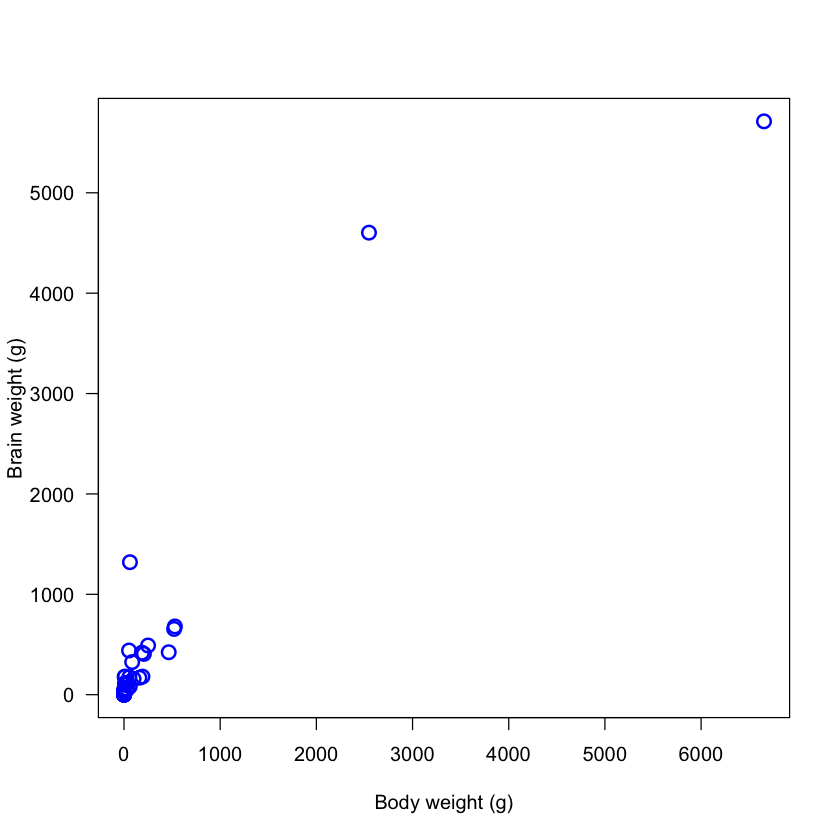

In [28]:
brain <- read.table("../data/brainweight.txt", header = TRUE)
plot(brain$body, brain$brain, xlab="Body weight (g)", ylab="Brain weight (g)", las=1, cex = 1.5, col = "blue", lwd = 2)

##### **2.**

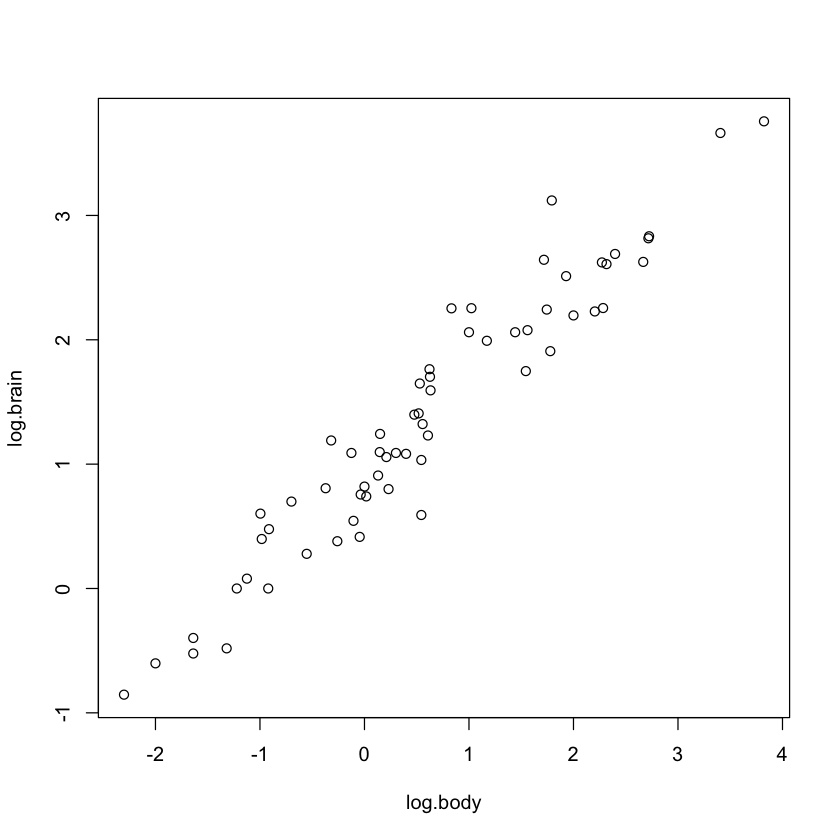

In [30]:
# Now we log trainsform them:
# MORE CORRECTLY:
brain <- within(brain, {
    log.brain <- log(brain, 10)
    log.body <- log(body, 10)
})
plot(log.brain ~ log.body, data = brain)

##### **3.**

In [32]:
# Now we just fit a regression model describing log_brain as a function of log_body:
# lm_brain <- lm(log_brain ~ log_body)
# summary(lm_brain)

lm_brain <- lm(log.brain ~ log.body, data = brain)
summary(lm_brain)


Call:
lm(formula = log.brain ~ log.body, data = brain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74503 -0.21380 -0.02676  0.18934  0.84613 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92713    0.04171   22.23   <2e-16 ***
log.body     0.75169    0.02846   26.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3015 on 60 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9195 
F-statistic: 697.4 on 1 and 60 DF,  p-value: < 2.2e-16


##### **4.**

From the output above, we can see that:
$$
\begin{align*}
\text{log\_brain} & = \beta_0 + \beta_1 \cdot \text{log\_body} + \epsilon \\
\end{align*}
$$
$$
= 2.135 + 0.7517 \cdot \text{log\_body}
$$
Now we take the antilog on both sides to get:
$$
\text{brain} = e^{2.135} \cdot \text{body}^{0.7517}
$$
$$
= 8.46 \cdot \text{body}^{0.7517}
$$
Now we see that the structure bewteen body and brain is in fact not linear, but a power relationship.

##### **5.**

In [33]:
# Now we estimate the confidence interval for the parameters:
CI <- confint(lm_brain)
CI[1, ] <- 10^CI[1, ]  # Transforming back the intercept
round(CI, 2 )

,2.5 %,97.5 %
(Intercept),6.98,10.25
log.body,0.69,0.81


##### **6.**

If the brain to body reatio is constant, then the slope should equal $1$.

In [36]:
b_hat <- coef(lm_brain)[2]
se_b <- summary(lm_brain)$coefficients[2, 2]

# t-statistic for H0: beta = 1
t_value <- (b_hat - 1) / se_b
t_value

# Two-sided p-value
p_value <- pt(-abs(t_value), df = lm_brain$df.residual)
p_value

log.body 
-8.723929

log.body 
1.442185e-12

We see that the $p$-value for log-body is less than 0.05, hence we reject the null hypothesis that the slope equals 1.

##### **7.**

Ok.

### **Process exercise**

<img src="SymPyBilleder/2025-11-03-13-38-25.png" width="550">

##### **1.**

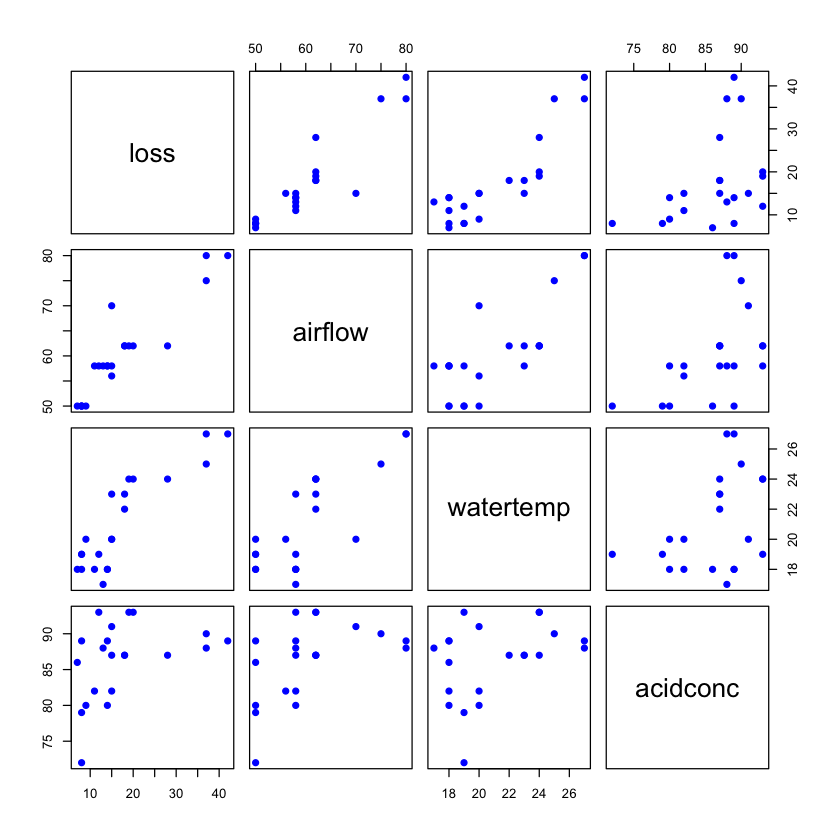

In [92]:
# Again, we read the data:
process <- read.table("../data/process.txt", header = TRUE)
# We have variables, airflow, watertemp, loss and acidconc and we plot them all:
pairs(process, pch = 19, col = "blue")

For now, the most interesting variable might be watertemp and then airflow after.

##### **2.**

In [93]:
# Now using simple linear regression, we assess wether the variables have influence on loss.
lm_process1 <- lm(loss ~ airflow, data = process)
summary(lm_process1)

lm_process2 <- lm(loss ~ watertemp, data = process)
summary(lm_process2)

lm_process3 <- lm(loss ~ acidconc, data = process)
summary(lm_process3)


Call:
lm(formula = loss ~ airflow, data = process)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
airflow       1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09



Call:
lm(formula = loss ~ watertemp, data = process)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8904 -3.6206  0.3794  2.8398  8.4747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.9109     7.6056  -5.511 2.58e-05 ***
watertemp     2.8174     0.3567   7.898 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.043 on 19 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7542 
F-statistic: 62.37 on 1 and 19 DF,  p-value: 2.028e-07



Call:
lm(formula = loss ~ acidconc, data = process)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.584  -5.584  -3.066   1.247  22.416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -47.9632    34.5044  -1.390   0.1806  
acidconc      0.7590     0.3992   1.901   0.0725 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.565 on 19 degrees of freedom
Multiple R-squared:  0.1599,	Adjusted R-squared:  0.1156 
F-statistic: 3.615 on 1 and 19 DF,  p-value: 0.07252


As expected, watertemp might have some influence on loss, as its slope is the highest with a value on $2.8$. Meanwhile, airflow is $1$ so this one is constant, and then acidconc might be interesting, having a slope value of $0.76$.

##### **3.**

Now we use multiple linear regression to assess the influence of all variables on loss.

In [94]:
# Mutiple linear regression
lm_process_all <- lm(loss ~ airflow + watertemp + acidconc, data = process)
summary(lm_process_all)


Call:
lm(formula = loss ~ airflow + watertemp + acidconc, data = process)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
airflow       0.7156     0.1349   5.307  5.8e-05 ***
watertemp     1.2953     0.3680   3.520  0.00263 ** 
acidconc     -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


In [ ]:
# We check significance like this:
summary(lm_process1)$coefficients    # airflow
summary(lm_process2)$coefficients    # watertemp
summary(lm_process3)$coefficients    # acidconc
summary(lm_process_all)$coefficients # all together

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-44.132025,6.10585762,-7.227818,7.314184e-07
airflow,1.020309,0.09995287,10.207905,3.774296e-09


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-41.910867,7.6056213,-5.510512,2.575258e-05
watertemp,2.817445,0.3567438,7.897672,2.028017e-07


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-47.9631841,34.5043888,-1.390060,0.1805827
acidconc,0.7589552,0.3991529,1.901415,0.0725230


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-39.9196744,11.8959969,-3.3557234,3.750307e-03
airflow,0.7156402,0.1348582,5.3066130,5.799025e-05
watertemp,1.2952861,0.3680243,3.5195672,2.630054e-03
acidconc,-0.1521225,0.1562940,-0.9733098,3.440461e-01


Here we see how acidconc is borderline significant, as $Pr(>|t|)$ is around $0.05$.

"When you fit simple regressions, each variable is tested in isolation - i.e. its raw correlation with loss.
But in the multiple regression, the model controls for all the other predictors, so it only tests the unique contribution of each variable.

If two predictors are correlated with each other (say airflow and watertemp), they explain some of the same variance in loss. When you include both in the model, one of them (often airflow) may no longer add unique information - hence its p-value increases (becomes nonsignificant).

That’s multicollinearity or shared explanatory power."

##### **4.**

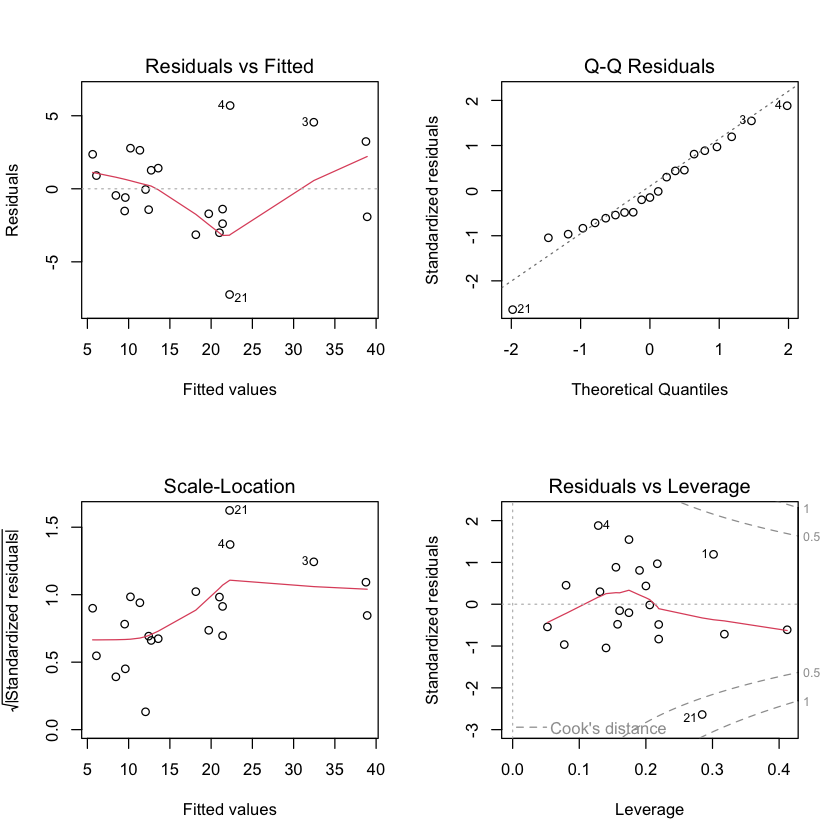

In [97]:
# We plot this:
par(mfrow = c(2, 2))
plot(lm_process_all)

##### **5.**

##### **6.**

##### **7.**

##### **8.**

# **Slide 9 in R code**

,State,murder.rate,college
,<chr>,<dbl>,<dbl>
1,Alabama,7.4,20.4
2,Alaska,4.3,28.1
3,Arizona,7.0,24.6
4,Arkansas,6.3,18.4
5,California,6.1,27.5
6,Colorado,3.1,34.6


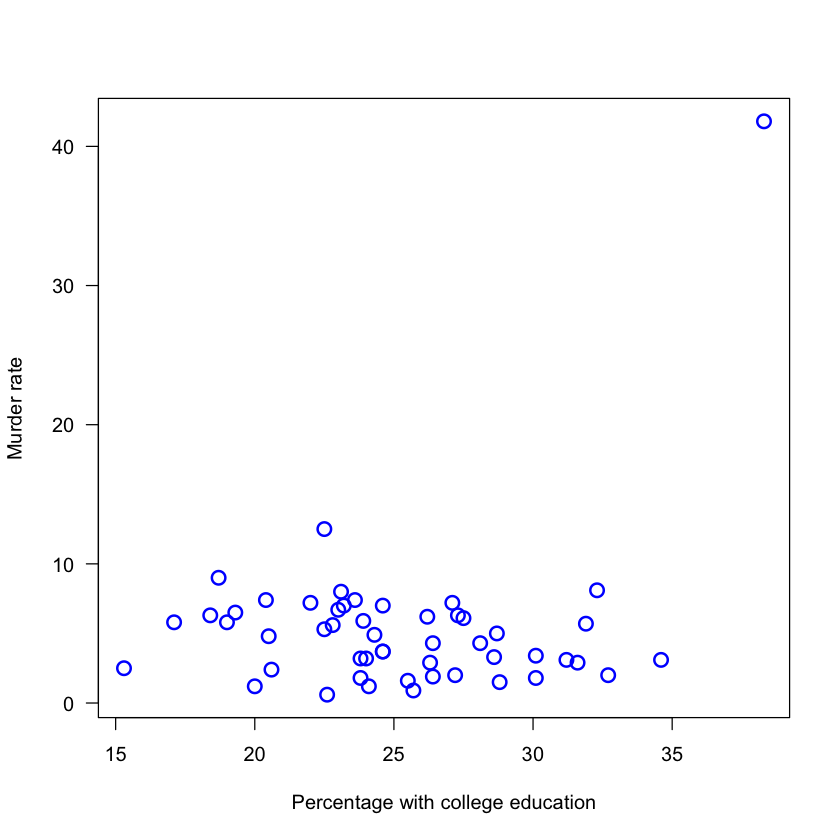

In [2]:
# Slide 7:
crime <- read.delim("../data/us_statewide_crime.txt")
crime<-crime[,c(1,3,6)]
head(crime)

plot(crime$college, crime$murder.rate, xlab="Percentage with college education",
     ylab="Murder rate", las=1, cex = 1.5, col = "blue", lwd = 2)

In [3]:
# Slide 14:
x <- crime$college
y <- crime$murder.rate
(beta <- sum((x-mean(x))*(y-mean(y)))/sum((x-mean(x))^2))

(alpha <- mean(y)- beta*mean(x))

Fitted <- alpha + beta*x
Resid <- y - Fitted
sigma2 <- sum(Resid^2)/(length(y)-2)
sqrt(sigma2)
# [1] 5.6146

[1] 0.33307

[1] -3.058072

[1] 5.61458

In [4]:
# Slide 15:
reg1 <- lm(murder.rate ~  college, data = crime)
summary(reg1)


Call:
lm(formula = murder.rate ~ college, data = crime)

Residuals:
   Min     1Q Median     3Q    Max 
-5.833 -3.368 -1.403  1.981 32.101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -3.0581     4.3630  -0.701   0.4867  
college       0.3331     0.1703   1.955   0.0563 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.615 on 49 degrees of freedom
Multiple R-squared:  0.07238,	Adjusted R-squared:  0.05345 
F-statistic: 3.823 on 1 and 49 DF,  p-value: 0.05626


In [5]:
# Slide 16:
confint(reg1)
#Nice table
tab <- cbind(coef(summary(reg1))[ , 1:2], "Lower" = confint(reg1)[ , 1],
             "Upper" = confint(reg1)[ , 2])
tab
#Nice table with p-values
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(reg1))[ , 4], digits = 3, eps = 1e-3))

,2.5 %,97.5 %
(Intercept),-11.825900553,5.7097573
college,-0.009244278,0.6753843


,Estimate,Std. Error,Lower,Upper
(Intercept),-3.058072,4.3630260,-11.825900553,5.7097573
college,0.333070,0.1703416,-0.009244278,0.6753843


,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.06,4.36,-11.83,5.71,0.4867
college,0.33,0.17,-0.01,0.68,0.0563


,State,murder.rate,college
,<chr>,<dbl>,<dbl>
9,District of Columbia,41.8,38.3


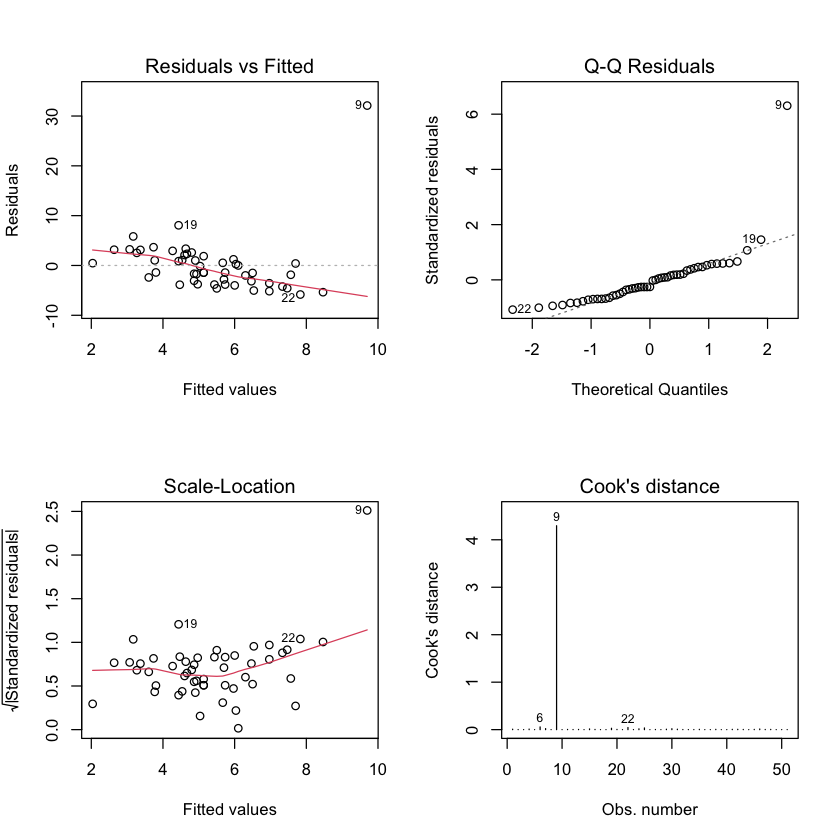

In [6]:
# Slide 21:

par(mfrow = c(2, 2))
plot(reg1, which = 1:4)
par(mfrow = c(1, 1))

crime[9,]

In [7]:
# Slide 23:

1-(1-2*(1-pnorm(reg1$res[9]/sqrt(sigma2))))^51

# Slide 24:

crime50 <- crime[-9, ]
reg2 <- lm(murder.rate ~  college, data = crime50)

(sigma.new<-summary(reg2)$sigma)

1-(1-2*(1-pnorm(reg1$res[9]/sigma.new)))^51

9 
5.512491e-07

[1] 2.464061

9 
0

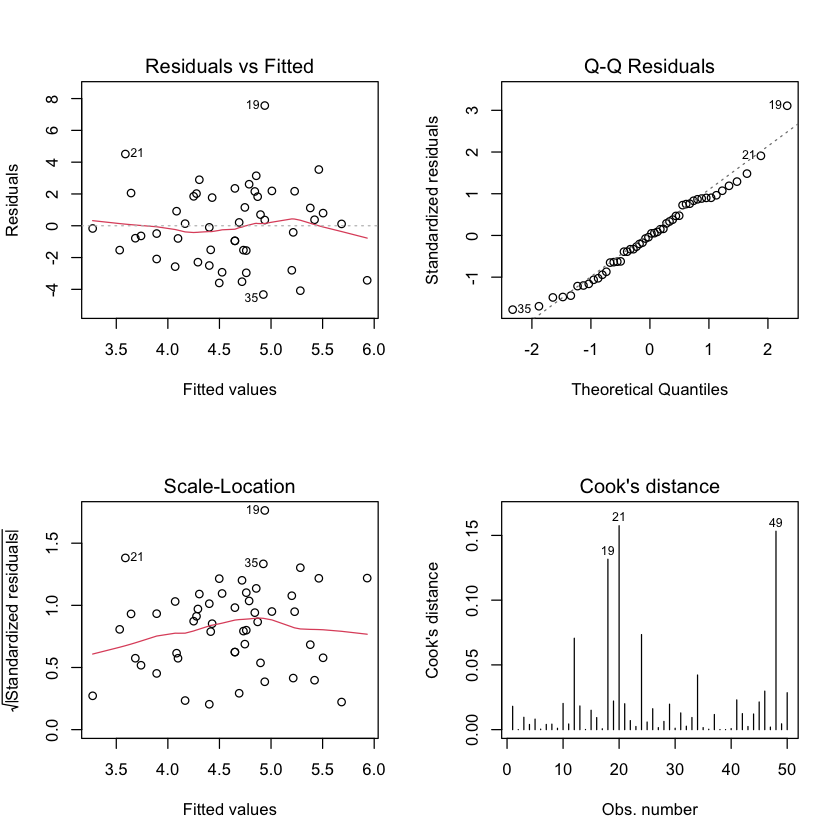

In [8]:
# Slide 26:

par(mfrow = c(2, 2))
plot(reg2, which = 1:4)
par(mfrow = c(1, 1))

In [9]:
# Slide 27:

summary(reg2)


Call:
lm(formula = murder.rate ~ college, data = crime50)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3255 -1.5533  0.0073  1.8450  7.5607 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.04159    2.06478   3.895 0.000304 ***
college     -0.13788    0.08163  -1.689 0.097687 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.464 on 48 degrees of freedom
Multiple R-squared:  0.0561,	Adjusted R-squared:  0.03644 
F-statistic: 2.853 on 1 and 48 DF,  p-value: 0.09769


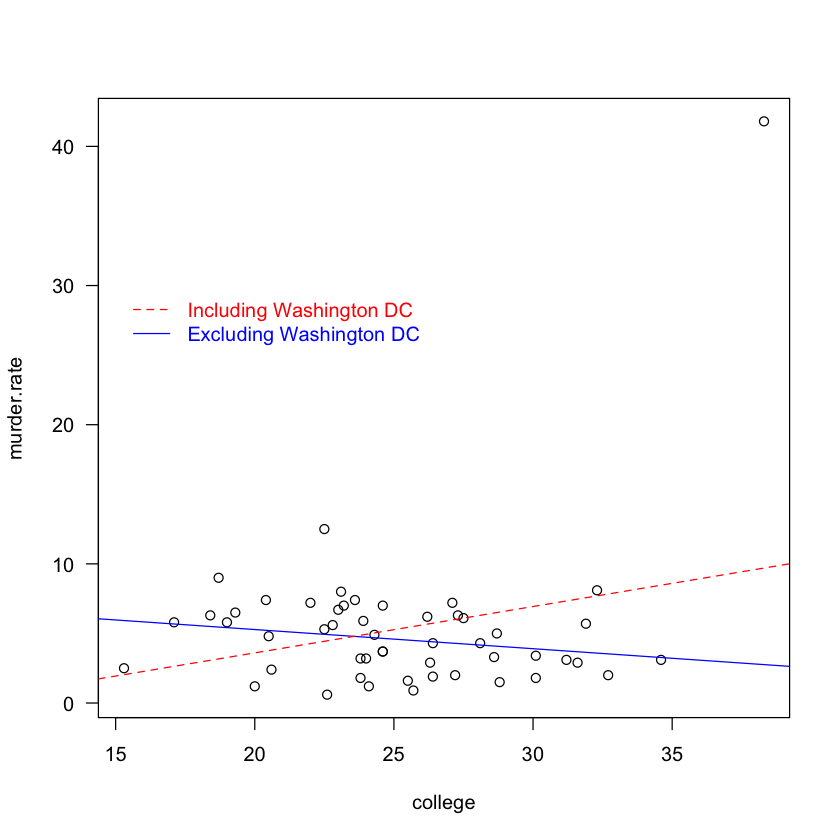

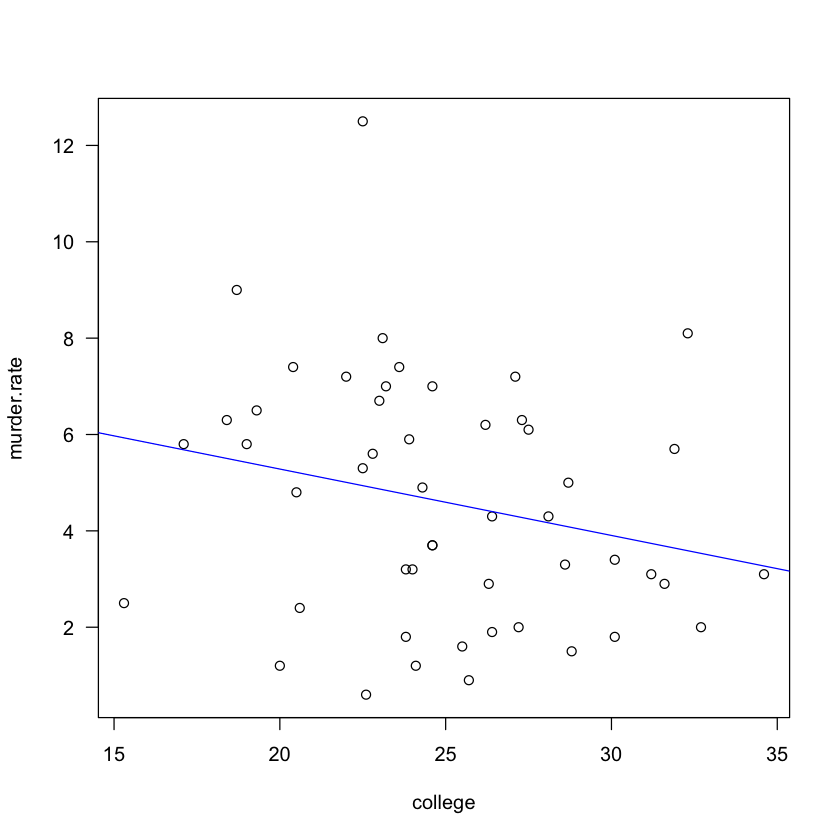

In [10]:
# Slide 28:
plot(murder.rate ~ college, data = crime, las=1)
abline(reg2,font=2,col="blue")
abline(reg1,font=2,col="red",lty=2)

legend(15,30,c("Including Washington DC","Excluding Washington DC"),
       lty=c(2,1),col=c("red","blue"),text.col=c("red","blue"),bty="n")

plot(murder.rate ~ college, data = crime50, las=1)
abline(reg2,font=2,col="blue")

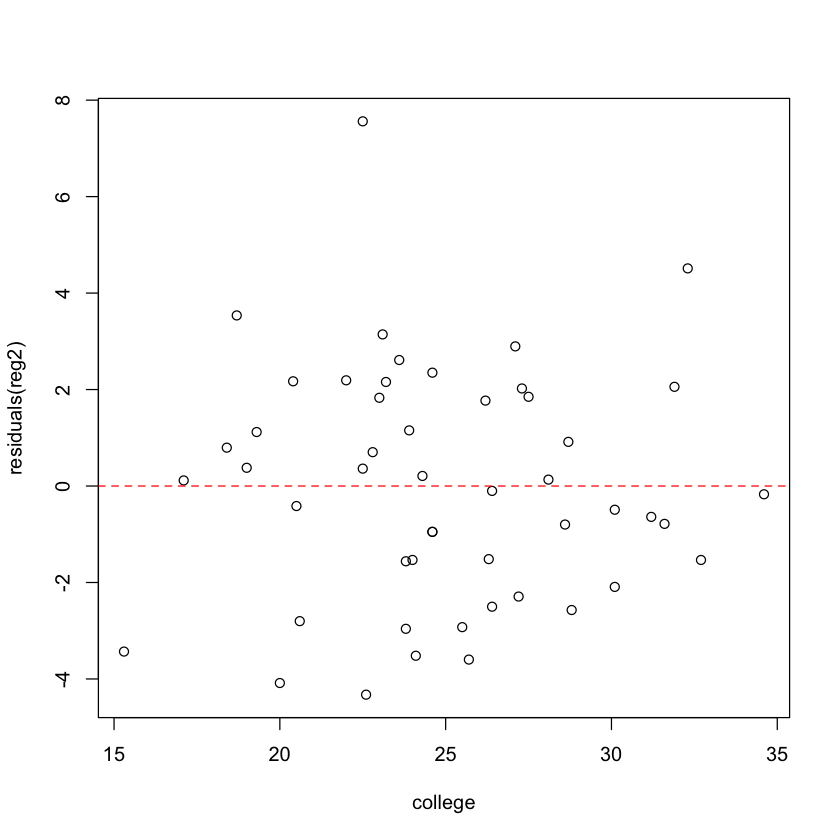

In [11]:
# Slide 29:

plot(residuals(reg2) ~ college, data=crime50)
abline(h = 0, lty = 2,col="red")

Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData



           Test stat Pr(>|Test stat|)
college      -0.1277           0.8989
Tukey test   -0.1277           0.8984


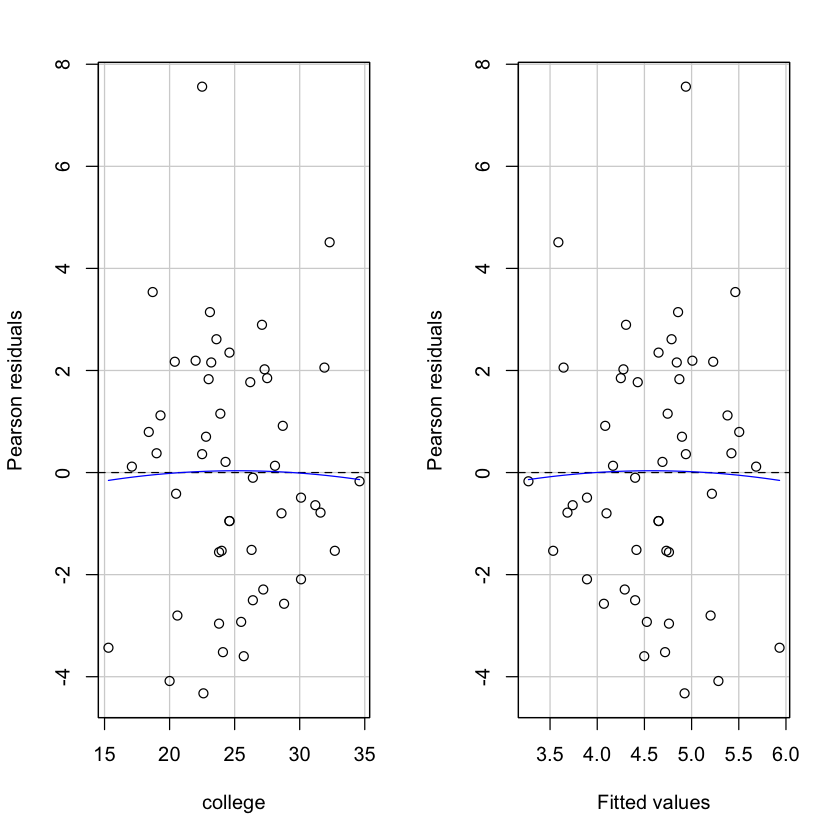

In [12]:
# Slide 30:
#Using the car package (Companion to Applied Regression)
# install.packages("car")
library(car)
residualPlots(reg2)

In [13]:
# Slide 31:

# curvature college:
reg3<-update(reg2,~.+I(college^2))
drop1(reg3,test="F")

# curvature fitted values (Tukeys test):
reg3<-update(reg2,~.+I(fitted(reg2)^2))
drop1(reg3,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,291.3355,94.12263,NA,NA
college,1,0.01645109,291.3520,92.12545,0.002653989,0.9591320
I(college^2),1,0.10107908,291.4366,92.13997,0.016306686,0.8989331


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,291.3355,94.12263,NA,NA
college,1,0.4288592,291.7644,92.19618,0.06918614,0.7936751
I(fitted(reg2)^2),1,0.1010791,291.4366,92.13997,0.01630669,0.8989331


In [ ]:
# Slide 34:

set.seed(1238)
ks.test(rnorm(100),"pnorm")
# p=0.82

ks.test(abs(rnorm(100)),"pexp")
# p=0.17

# Slide 35:

ks.test(rnorm(100)+0.008*rexp(100),"pnorm")
# p=0.34 

# Slide 36:

ks.test(rnorm(100000)+0.008*rexp(100000),"pnorm")
# p=0.0003 significant

# Slide 37:

qt(0.025,df=48)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(100)
D = 0.063339, p-value = 0.8172
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  abs(rnorm(100))
D = 0.1113, p-value = 0.1678
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(100) + 0.008 * rexp(100)
D = 0.094395, p-value = 0.335
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  rnorm(1e+05) + 0.008 * rexp(1e+05)
D = 0.0057518, p-value = 0.002676
alternative hypothesis: two-sided


[1] -2.010635

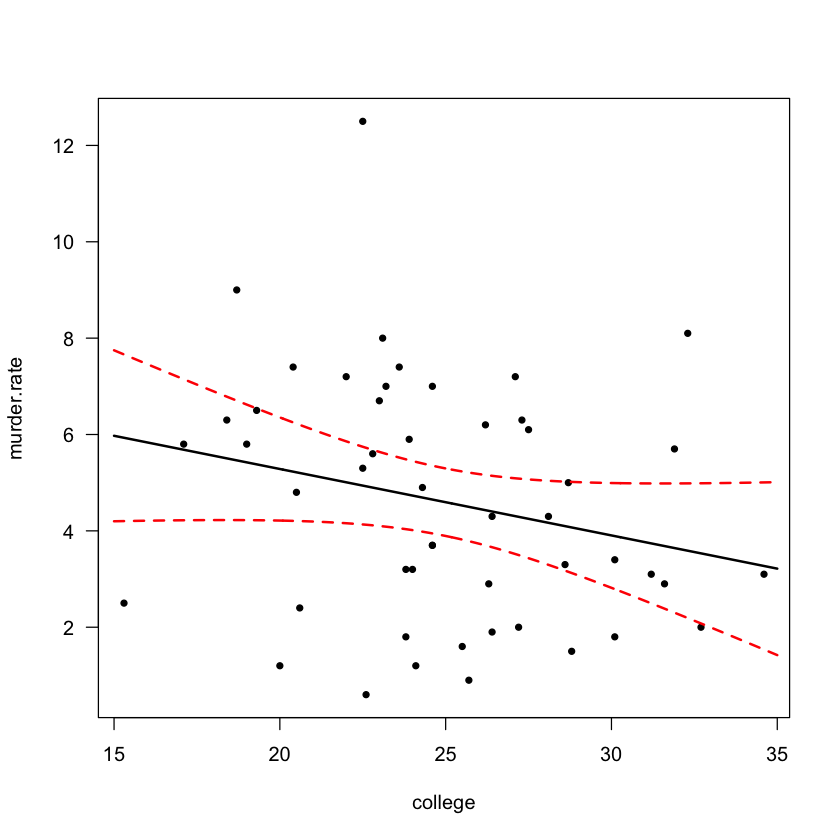

In [ ]:
# Slide 38:

xval <- seq(from=15, to=35, length.out=500)
newData <- data.frame(college=xval)
Pred.ci <- predict(reg2, newdata=newData,
                   interval="confidence",
                   level=.95)

plot(murder.rate ~ college, data = crime50, pch = 20, las = 1)
lines(xval, Pred.ci[, "fit"], lwd=2)  ## or use: abline(reg2)
lines(xval, Pred.ci[, "lwr"], lty=2, col="red", lwd=2)
lines(xval, Pred.ci[, "upr"], lty=2, col="red", lwd=2)

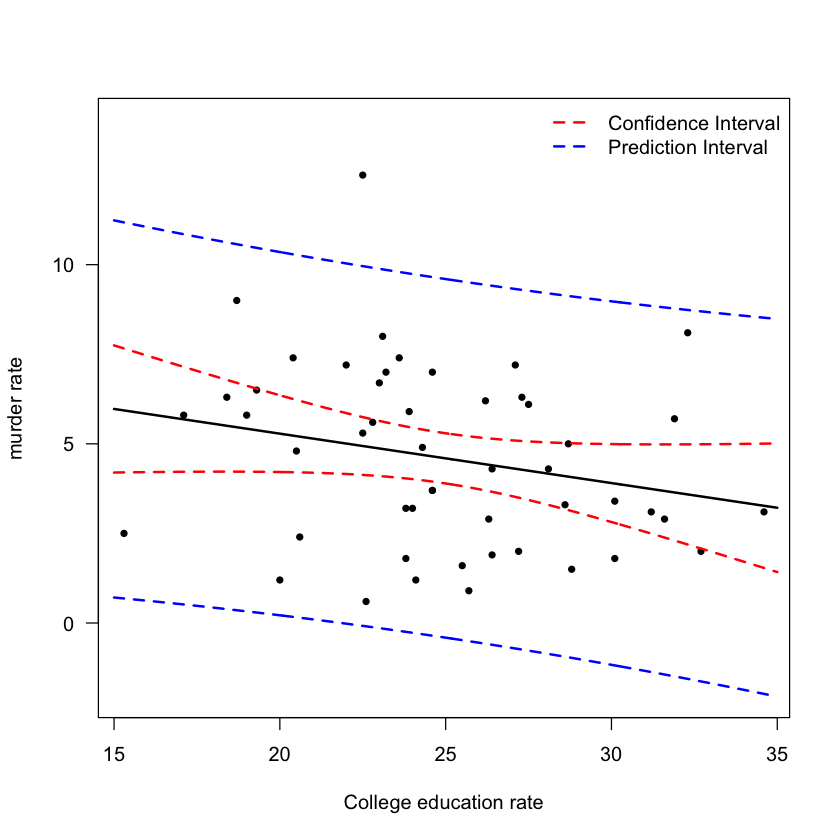

In [16]:
# Slide 40:

# redoing for wider range:
plot(murder.rate ~ college, data = crime50, pch = 20, las = 1, 
     ylim=c(-2,14),xlab="College education rate",ylab="murder rate")
lines(xval, Pred.ci[, "fit"], lwd=2)
lines(xval, Pred.ci[, "lwr"], lty=2, col="red", lwd=2)
lines(xval, Pred.ci[, "upr"], lty=2, col="red", lwd=2)

## Prediction interval for a new observation:
Pred.pi <- predict(reg2, newdata=newData,
                   interval="prediction")

## Add prediction intervals to plot:
lines(xval, Pred.pi[, "lwr"], lty=2,
      col="blue", lwd=2)
lines(xval, Pred.pi[, "upr"], lty=2,
      col="blue", lwd=2)
legend("topright",c("Confidence Interval","Prediction Interval"),
       lty=rep(2,1),lwd=rep(2,2),col=c("red","blue"),bty="n")

In [17]:
# Slide 45: 

#Nice table with p-values
tab <- cbind(coef(summary(reg2))[ , 1:2], "Lower" = confint(reg2)[ , 1],
             "Upper" = confint(reg2)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(reg2))[ , 4], digits = 3, eps = 1e-3))

,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),8.04,2.06,3.89,12.19,<0.001
college,-0.14,0.08,-0.30,0.03,0.0977


    Density         Hardness     
 Min.   :24.70   Min.   : 413.0  
 1st Qu.:37.77   1st Qu.: 962.8  
 Median :41.80   Median :1195.0  
 Mean   :45.73   Mean   :1469.5  
 3rd Qu.:56.70   3rd Qu.:1980.0  
 Max.   :69.10   Max.   :3260.0  

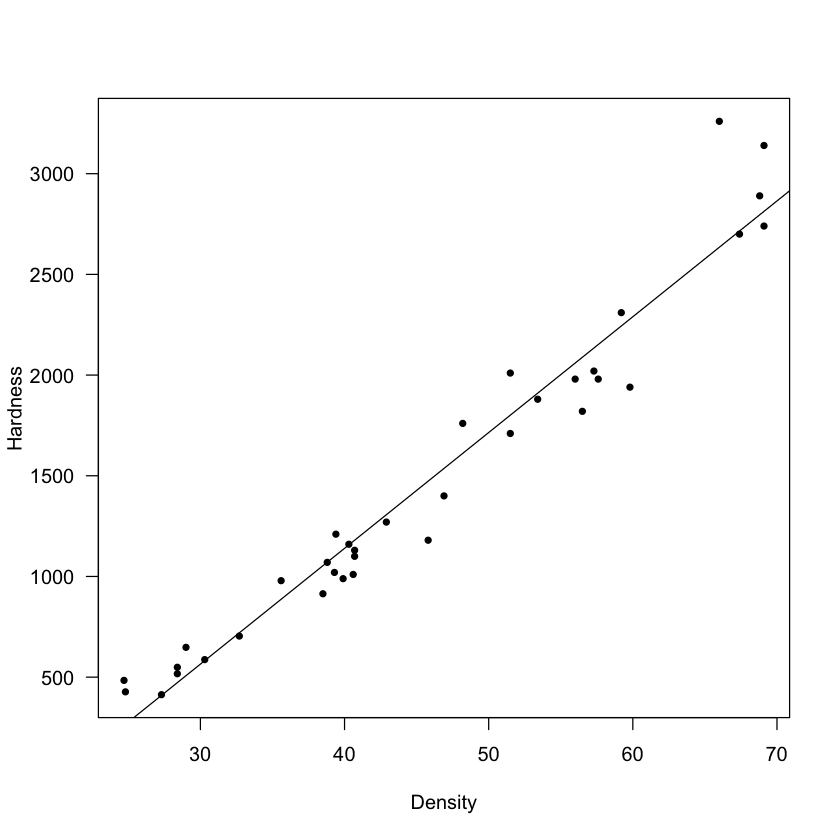

In [19]:
# Slide 47:

janka <- read.table("../data/janka.txt", header=TRUE, quote="\"")
names(janka) <- c("Density", "Hardness")
summary(janka)

reg3 <- lm(Hardness ~ Density, data = janka)
plot(Hardness ~ Density, data = janka, pch = 20, las = 1)
abline(reg3)

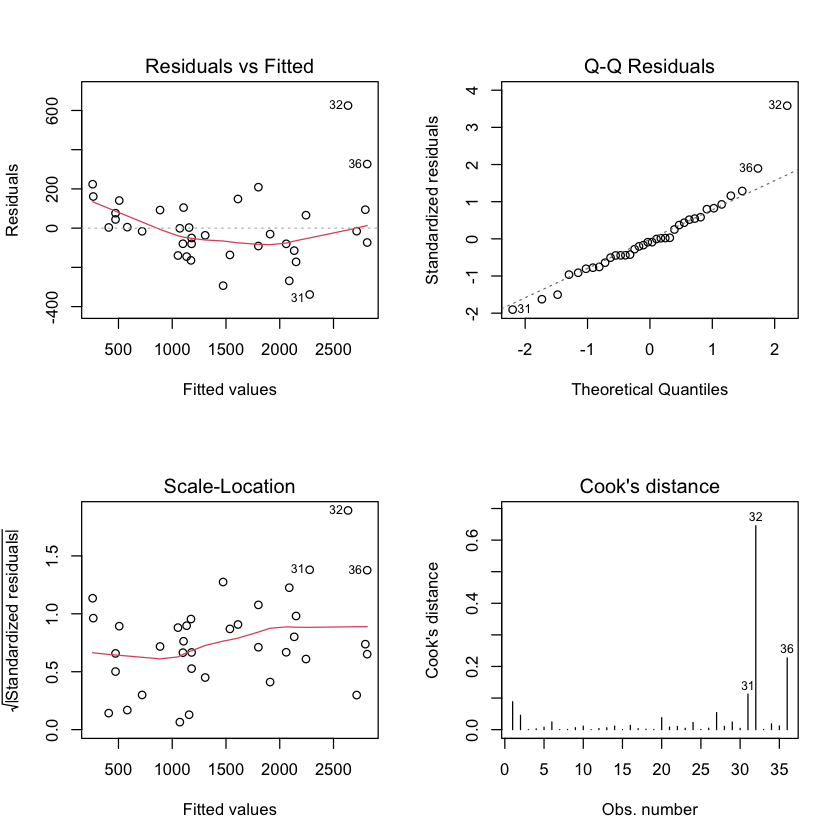

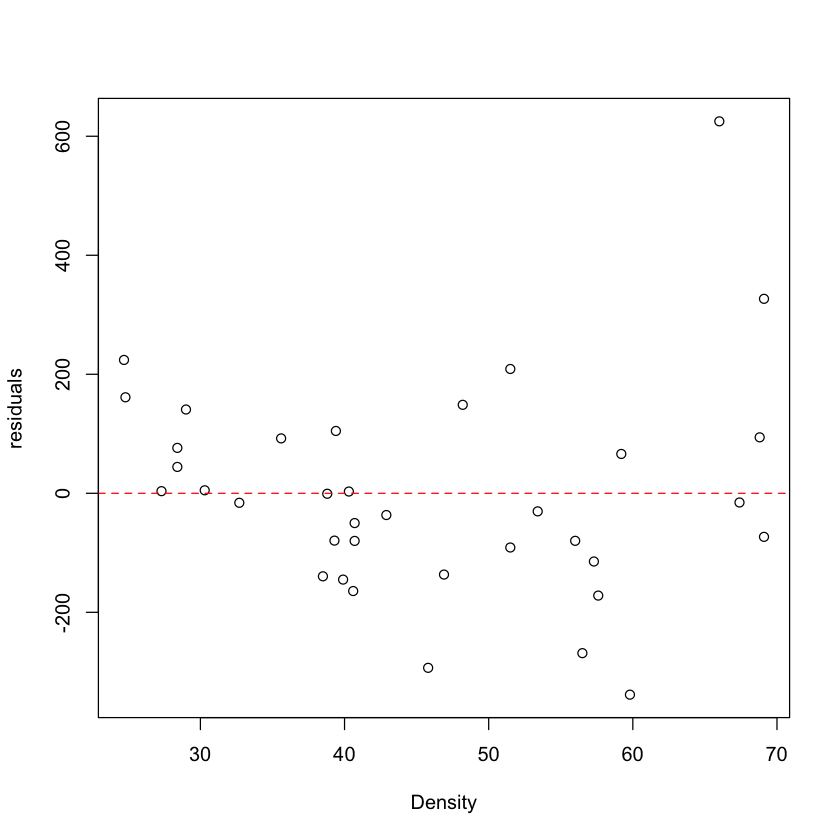

In [20]:
# Slide 48:

par(mfrow=c(2, 2))
plot(reg3, which=1:4)
par(mfrow=c(1, 1))

plot(residuals(reg3) ~ Density, data = janka, 
       ylab="residuals")
abline(h = 0,col="red",lty=2)

           Test stat Pr(>|Test stat|)   
Density       3.2483         0.002669 **
Tukey test    3.2483         0.001161 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


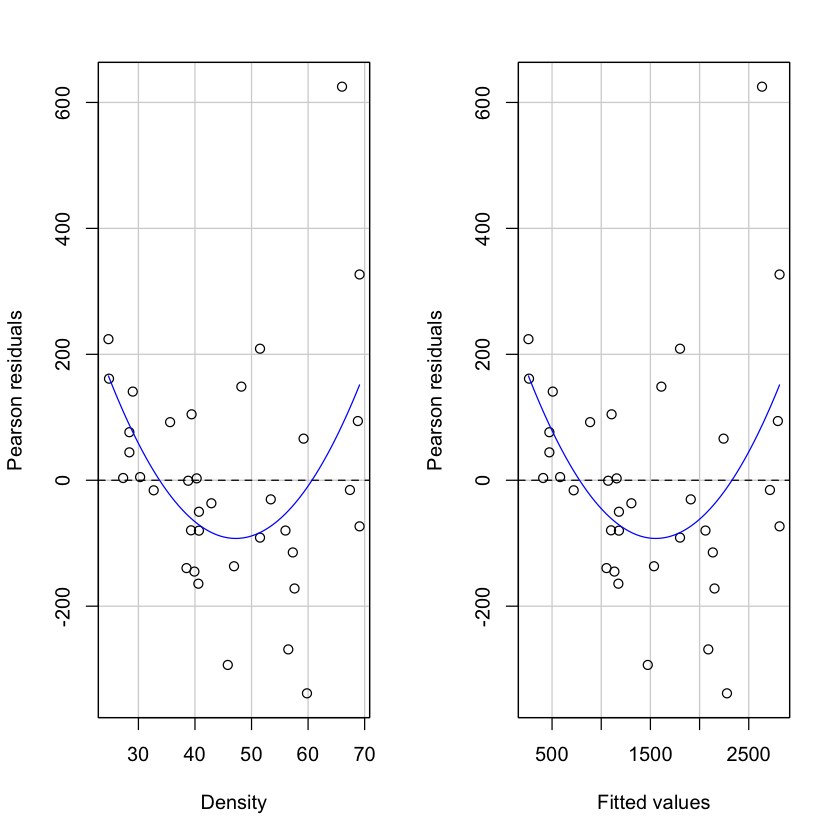

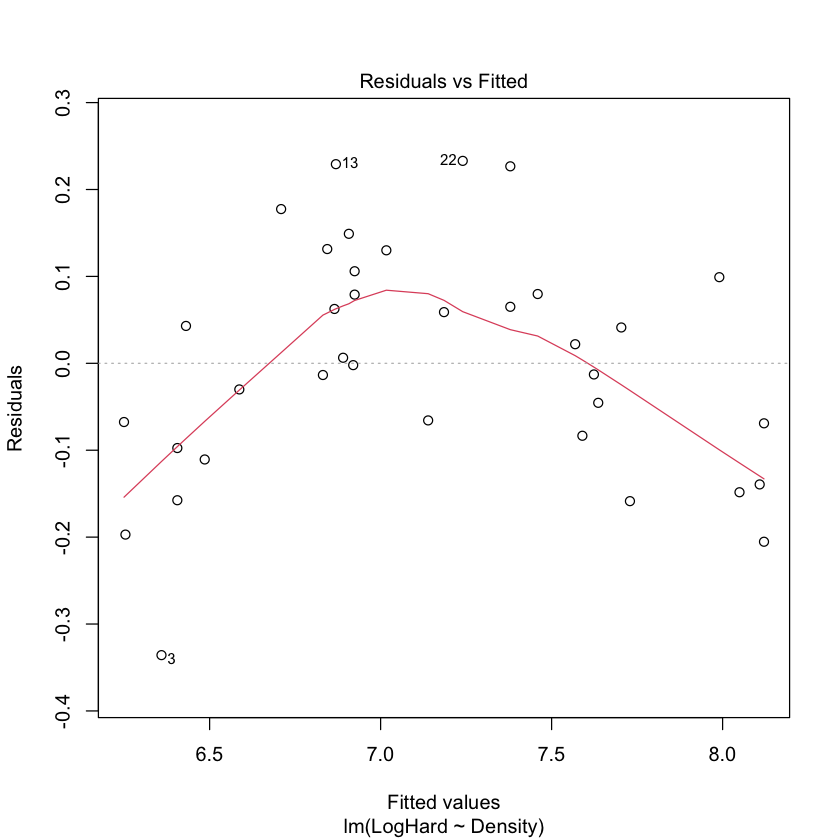

In [21]:
# Slide 49:
#Using the car package
residualPlots(reg3)

# Slide 51:

janka$LogHard <- log(janka$Hardness)
reg4 <- lm(LogHard ~ Density, data = janka)
plot(reg4, which=1)

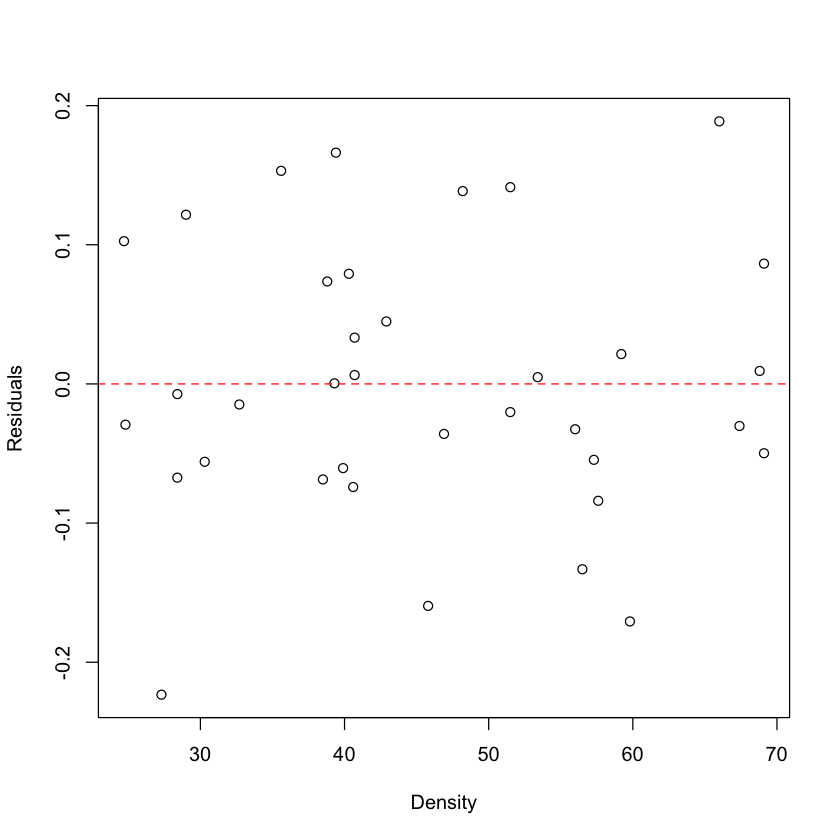

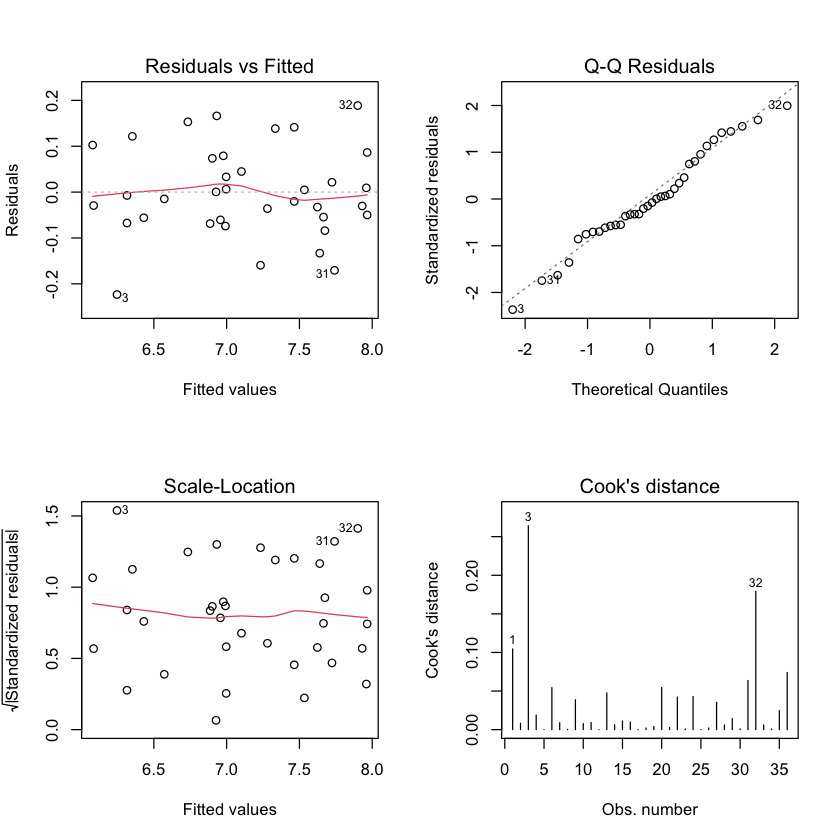

             Test stat Pr(>|Test stat|)  
Density         2.4645          0.01928 *
I(Density^2)    1.3611          0.18300  
Tukey test     -1.2757          0.20207  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


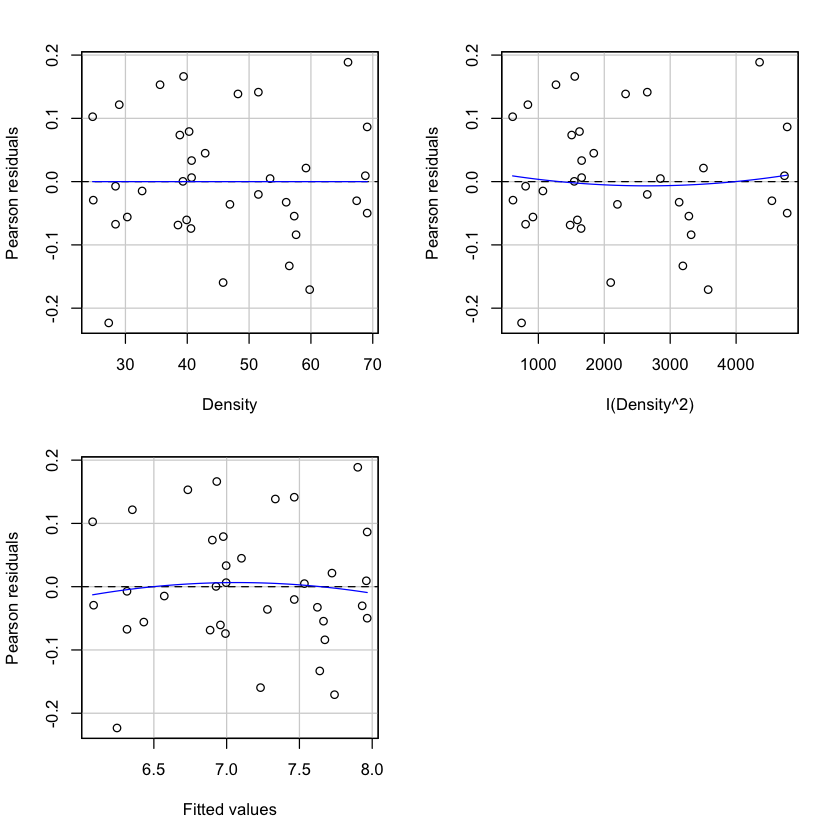

In [ ]:
# Slide 52:

reg5 <- lm(LogHard ~ Density + I(Density^2), data = janka)
plot(residuals(reg5) ~ Density, data = janka, 
     ylab="Residuals")
abline(h = 0,lty=2,col="red")

# Slide 53:

par(mfrow=c(2, 2))
plot(reg5, which=1:4)
par(mfrow=c(1, 1))

# Slide 54:

residualPlots(reg5)


Call:
lm(formula = LogHard ~ Density + I(Density^2), data = janka)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22331 -0.05708 -0.01104  0.07500  0.18871 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.138e+00  2.087e-01  19.828  < 2e-16 ***
Density       9.152e-02  9.305e-03   9.835 2.45e-11 ***
I(Density^2) -5.228e-04  9.764e-05  -5.354 6.49e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1008 on 33 degrees of freedom
Multiple R-squared:  0.9723,	Adjusted R-squared:  0.9706 
F-statistic: 578.9 on 2 and 33 DF,  p-value: < 2.2e-16


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,0.3351043,-162.3660,NA,NA
Density,1,0.9822075,1.3173119,-115.0853,96.72465,2.452470e-11
I(Density^2),1,0.2911097,0.6262140,-141.8570,28.66755,6.485645e-06


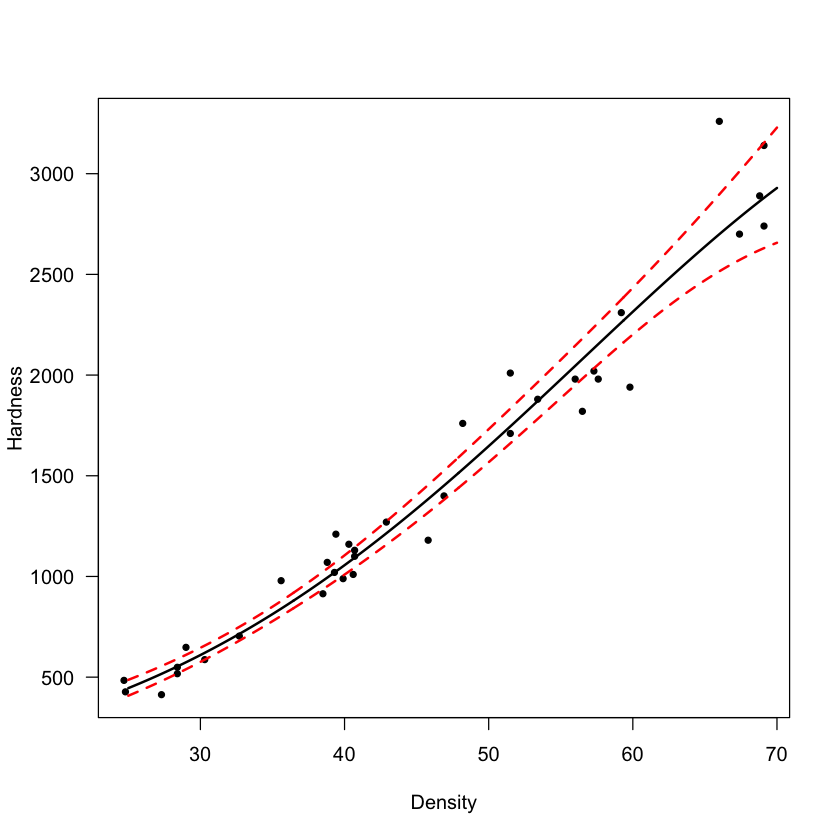

In [23]:
# Slide 55:
summary(reg5)
drop1(reg5,test="F")

# Slide 58:

xval <- seq(from=25, to=70, length.out=500)
newData <- data.frame(Density=xval)
Pred.ci <- predict(reg5, newdata=newData,
                   interval="confidence",
                   level=.95)

plot(Hardness ~ Density, data = janka, pch = 20, las = 1)
lines(xval, exp(Pred.ci[, "fit"]), lwd=2)  
lines(xval, exp(Pred.ci[, "lwr"]), lty=2, col="red", lwd=2)
lines(xval, exp(Pred.ci[, "upr"]), lty=2, col="red", lwd=2)

In [24]:
# slide 59:
my.se.fit<-predict(reg5, newdata=newData,
                   interval="confidence",
                   level=.95,se.fit=T)$se.fit

summary(exp(my.se.fit^2/2))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.000   1.000   1.001 